### About Dataset

The dataset pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes data

Columns: 

1. longitude: A measure of how far west a house is

2. latitude: A measure of how far north a house is

3. housing_median_age: Median age of a house within a block

4. total_rooms: Total number of rooms within a block

5. total_bedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. median_house_value: Median house value for households within a block (measured in US Dollars)

10. ocean_proximity: Location of the house with reference to ocean/sea


### Objective: 

Objective here is to perform data processing and exploratory data analysis on this dataset and use it for Regression Models to predict the district's median housing value, train a machine learning algorithm and provide results of the models performance in this report.

In [1]:
# import libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor



In [2]:
# load data

df = pd.read_csv("./California_housing_prices .csv")


# EDA

In [3]:
# showing last 10 rows

df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [4]:
# showing the data shape 

df.shape

(20640, 10)

In [5]:
# columns names

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

It appears the dataset contains 20640 observations and 10 columns. All attributes are numerical except the ocean_proximity field, it's type is object. We can notice that the total_bedrooms attribute has only 20,433 non-null values, meaning that 207 entries are missing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
# checking missing data 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# checking for duplicates
df.duplicated().sum()


0

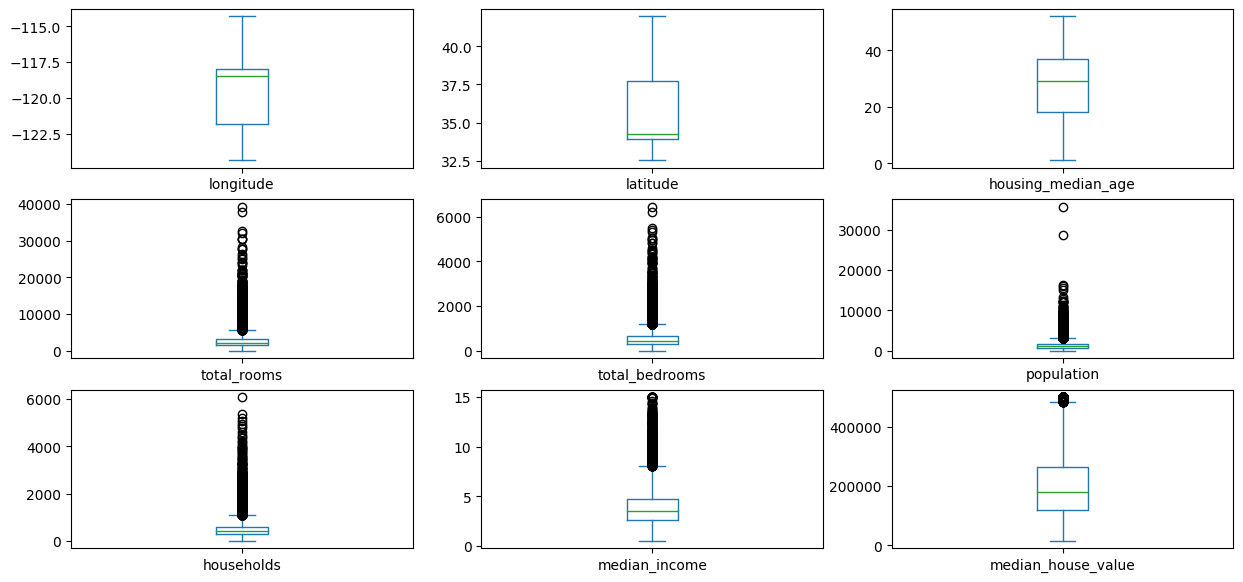

In [10]:
# checking for outliers

df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

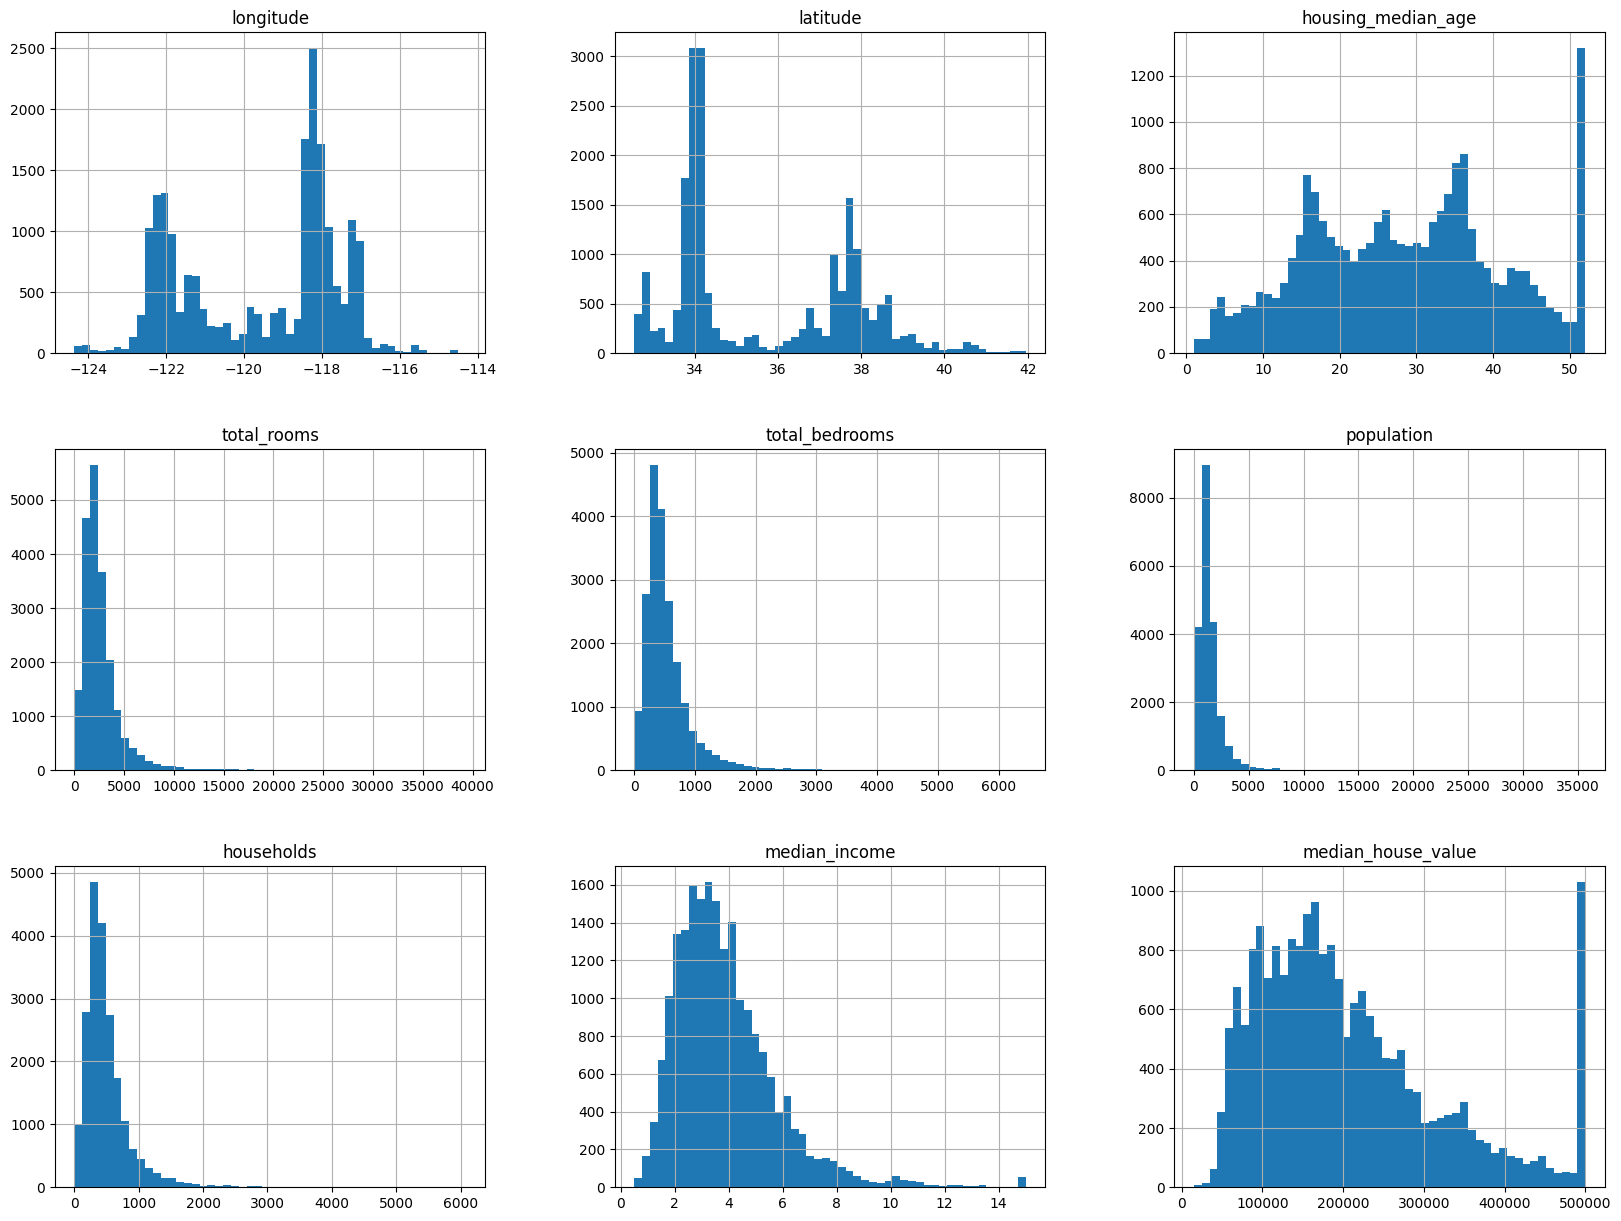

In [11]:
# plotting the distribution of variables 

df.hist(bins=50,figsize=(20,15))
plt.show()

Box plot and histogram are employed to visualise data distribution and check for outliers. it’s noticeable that Median_house_value has an odd peak at its maximum value around 500k, which could be an outlier. We have quite a few skewed data distributions, households, Population, total_bedrooms, total_rooms and median_income. The range of the x axis for these features is quite broad, indicating we have quite a few outliers. Population, total_bedrooms and total_rooms represent somewhat connected values, also have similar distribution which is skewed towards smaller values.


<Figure size 640x480 with 0 Axes>

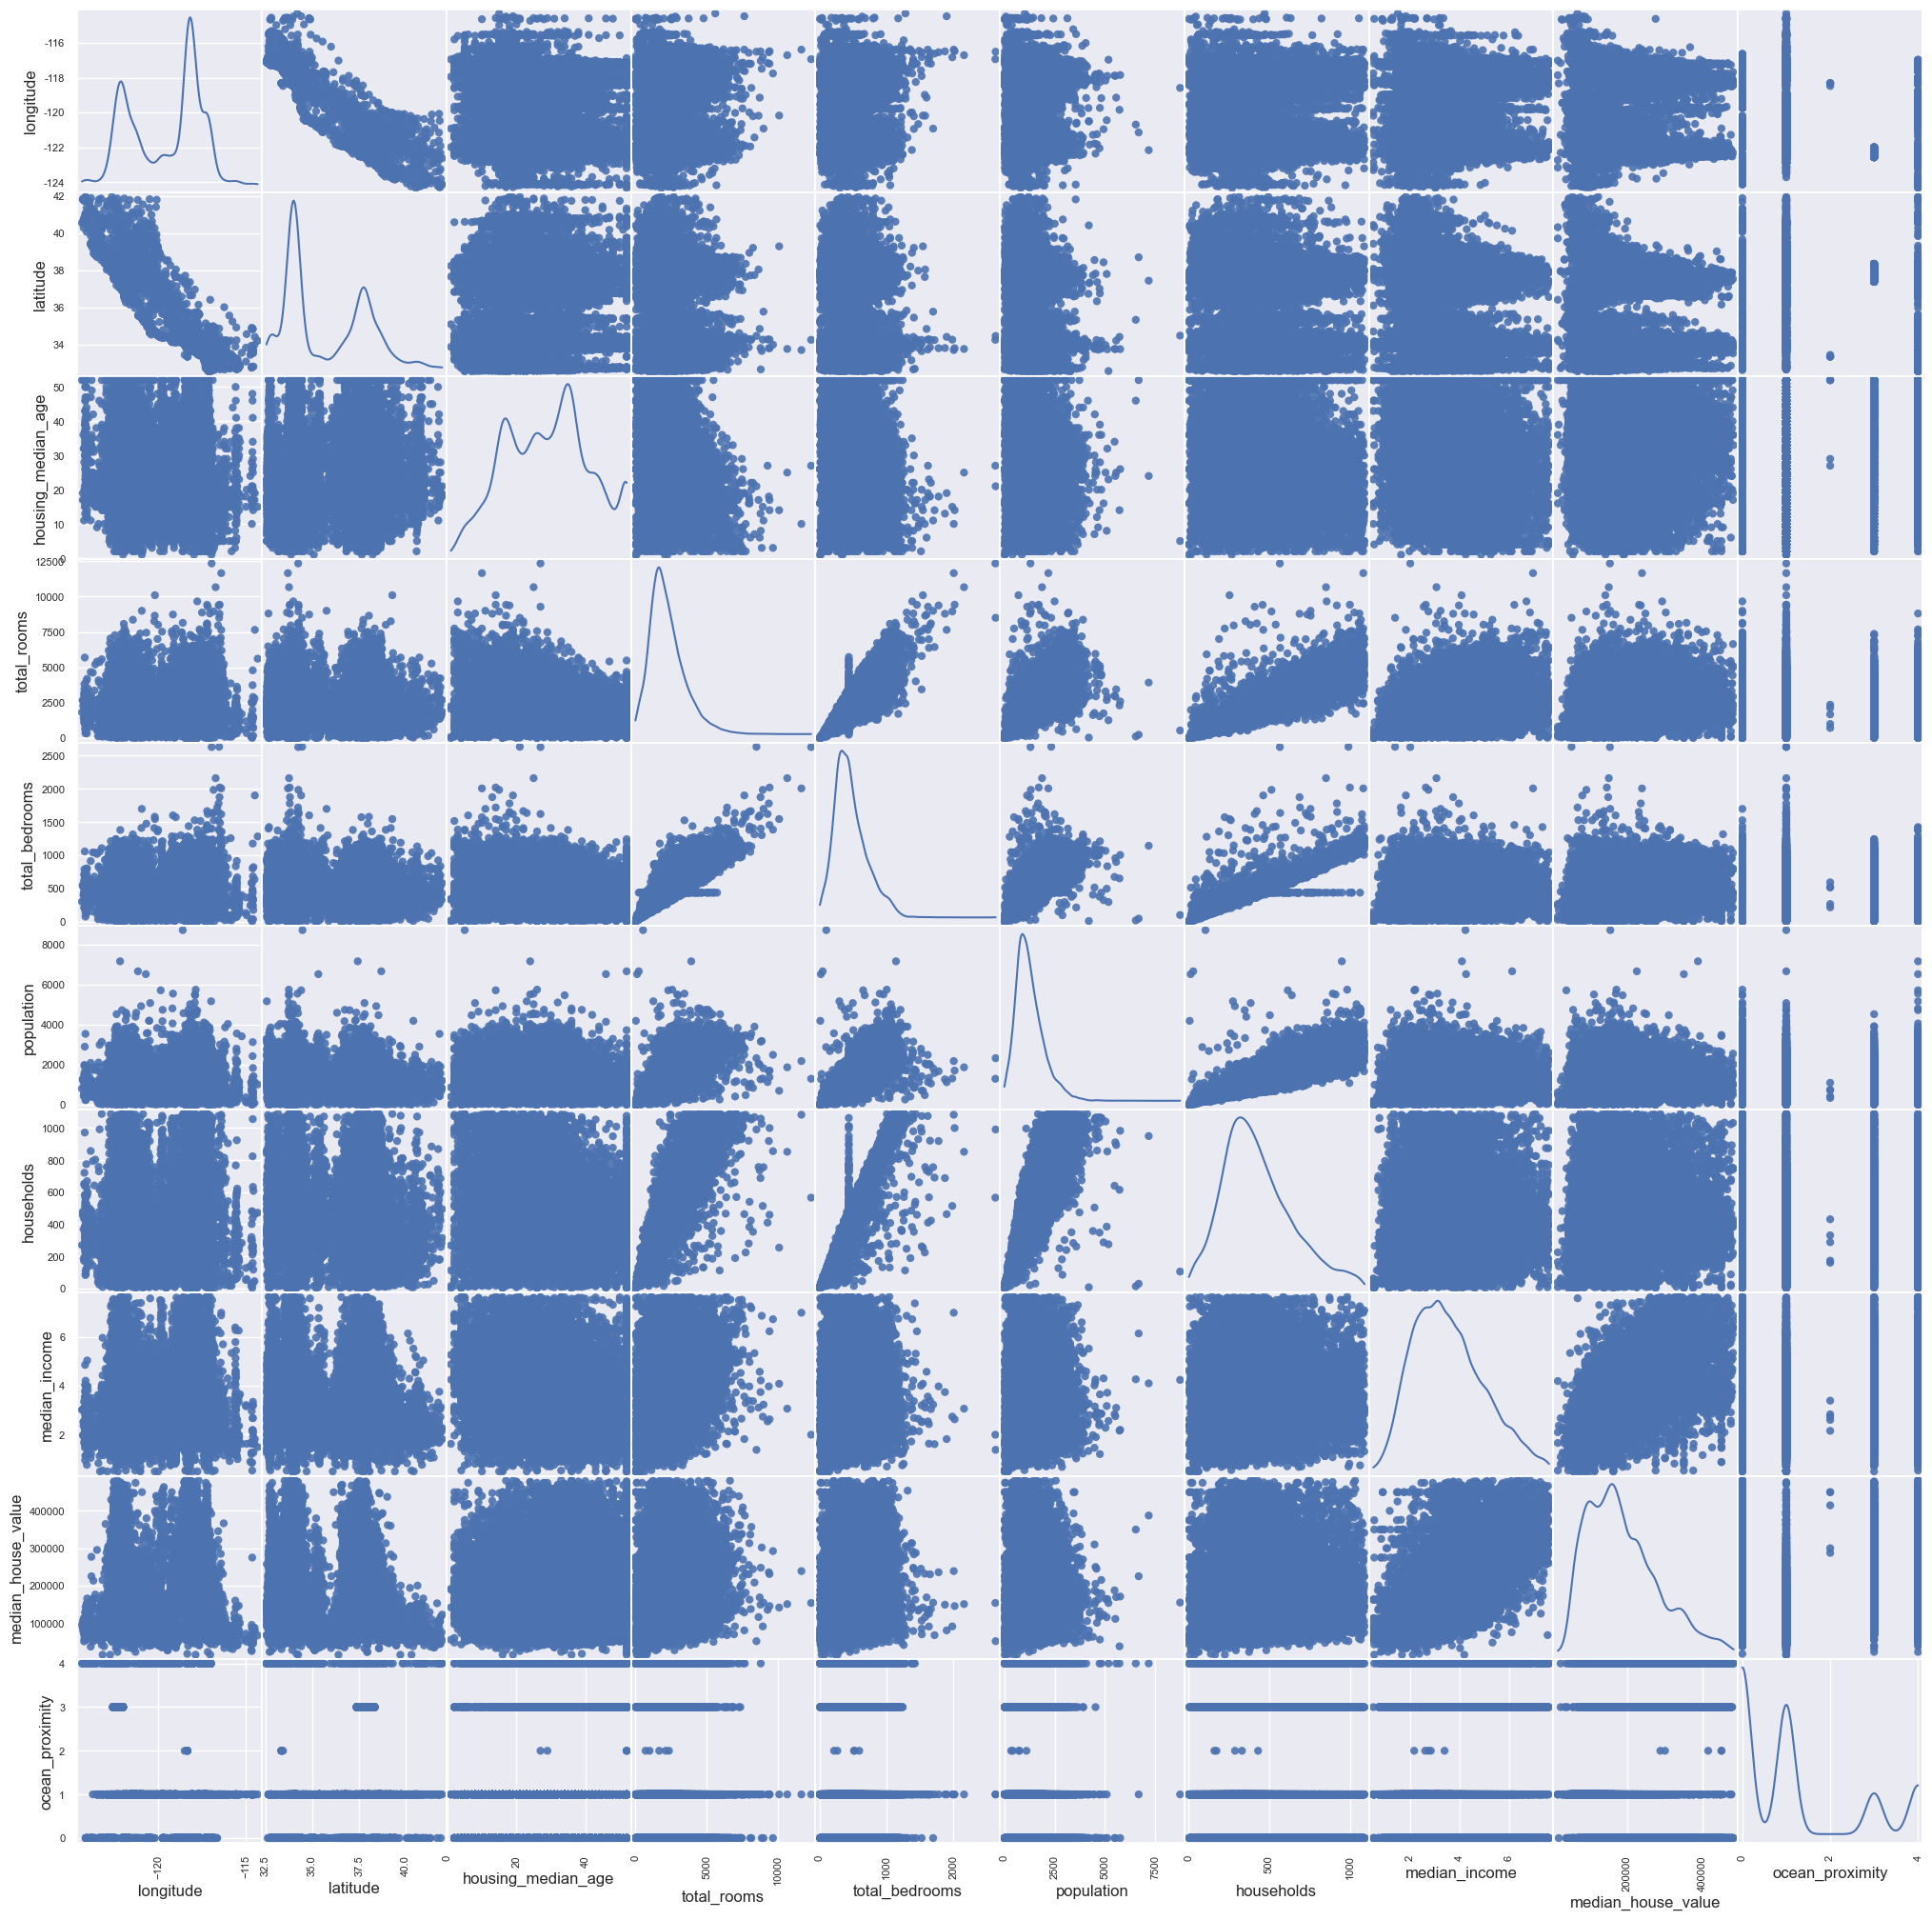

In [68]:
# displaying scatter plot between variables  

fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");
plt.show()

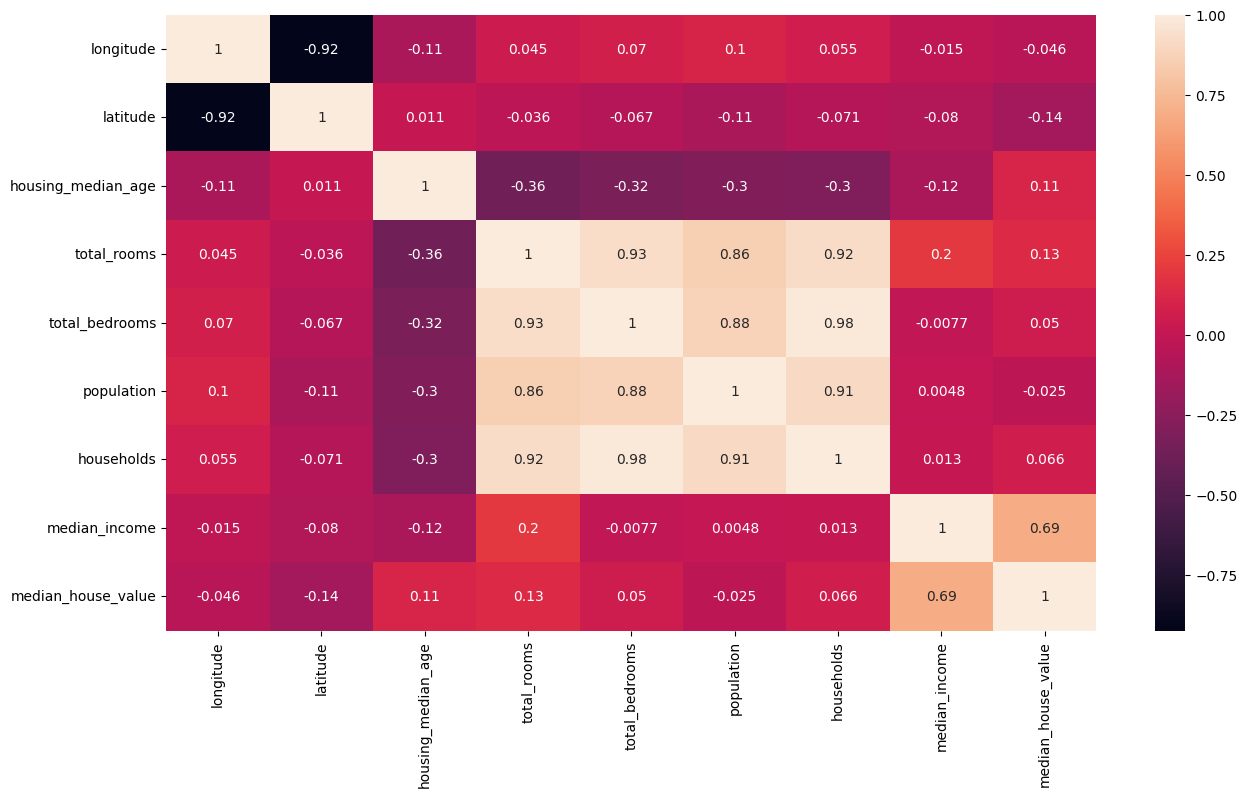

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

In [14]:
# Correlation between dependant variable and independent variables

corr_matrix = df.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

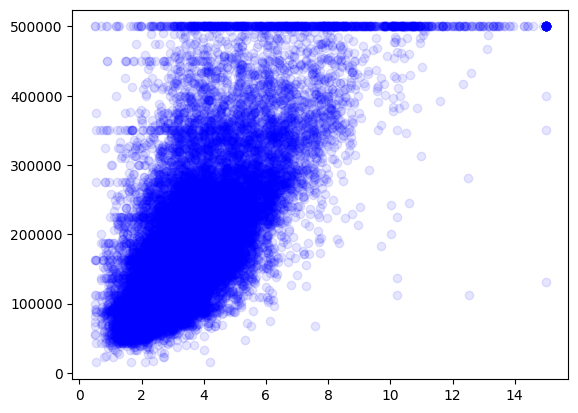

In [15]:
# check scatter plot between median_income and median_house_value

plt.scatter(df["median_income"],df["median_house_value"], alpha=0.1,color="b")

Target variable median_house_value is very mildly correlated to all but one feature median_income, so we can outline this as an important feature. The scatter plot show a strong liner relationship between the two valuables. households, Population, total_bedrooms and total_rooms appear to have very strong correlation. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. As my primary goal is to make predictions, and I don’t need to understand the role of each independent variable, I don’t need to reduce multicollinearity. longitude and latitude, they also have very strong correlation.


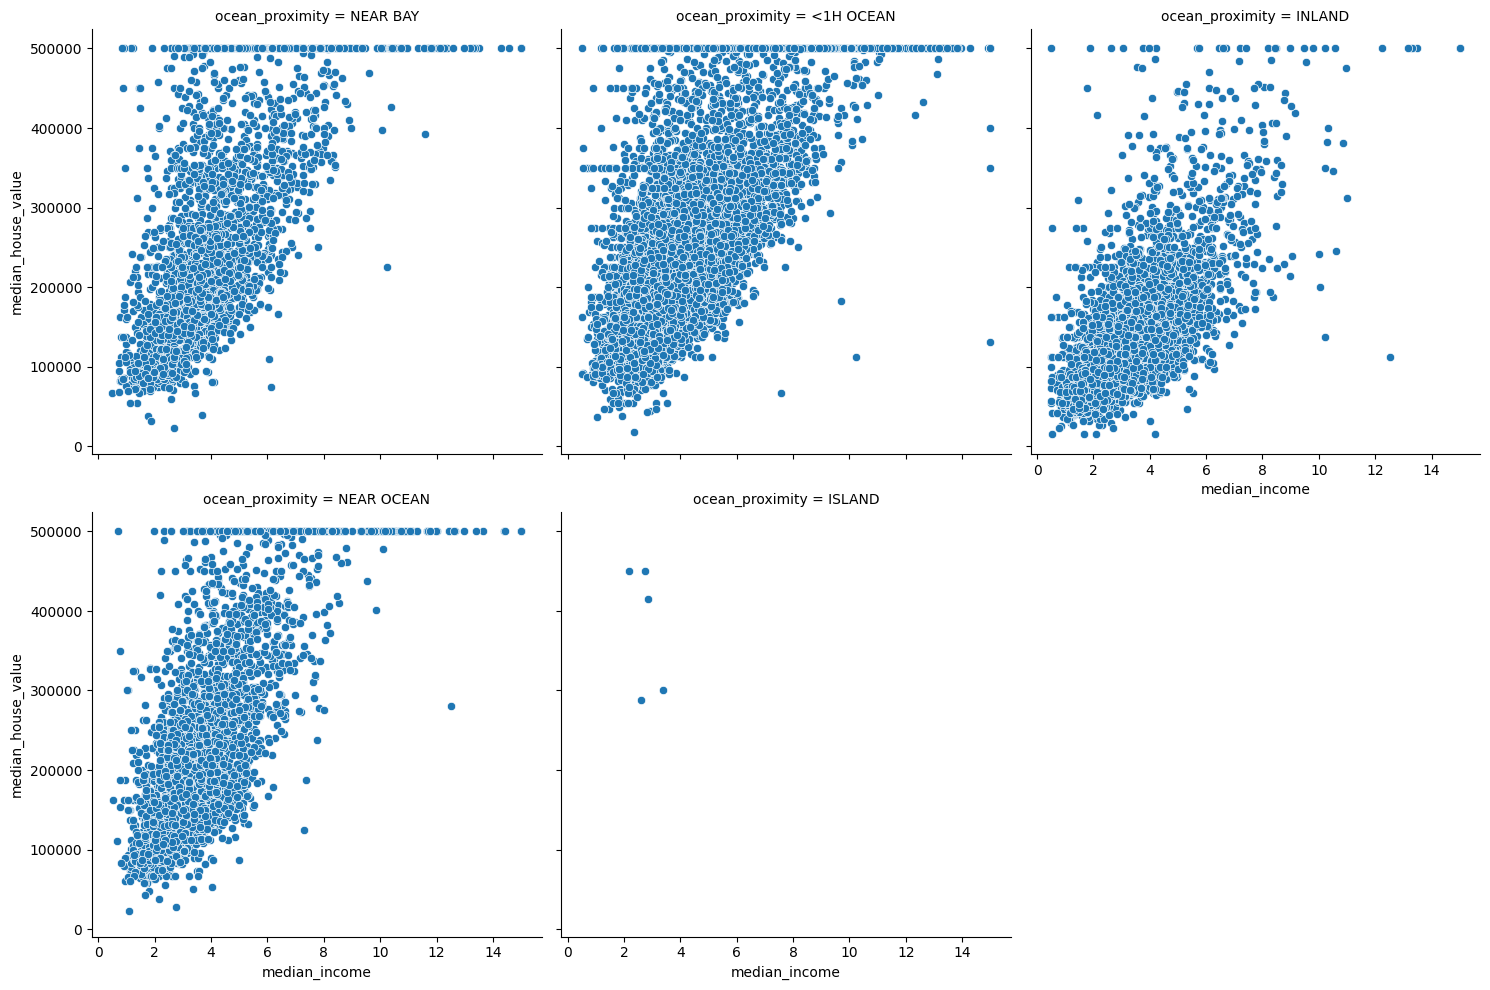

In [16]:
# ploting between median_income and median_house_value at each ocean_proximity

sns.relplot(x=df["median_income"],y=df['median_house_value'],col=df["ocean_proximity"],col_wrap=3)
plt.show()

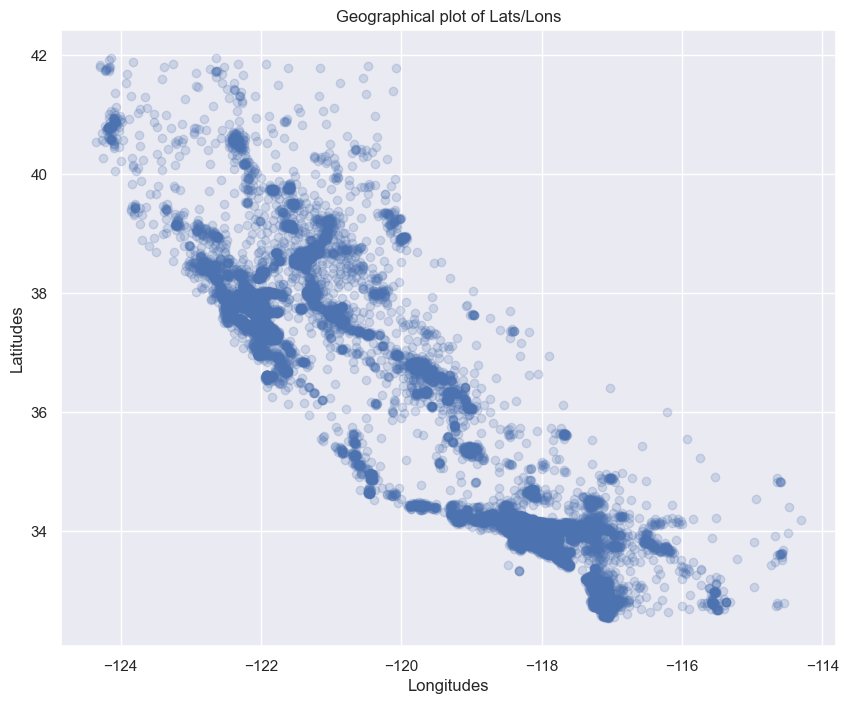

In [17]:
# geographical plot of Lats/Lons

sns.set()
plt.figure(figsize=(10,8))
plt.scatter(df['longitude'],df['latitude'], alpha=0.2)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

In [18]:
# explore the ocean_proximity column
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

[Text(0, 0, '9136'),
 Text(0, 0, '6551'),
 Text(0, 0, '2658'),
 Text(0, 0, '2290'),
 Text(0, 0, '5')]

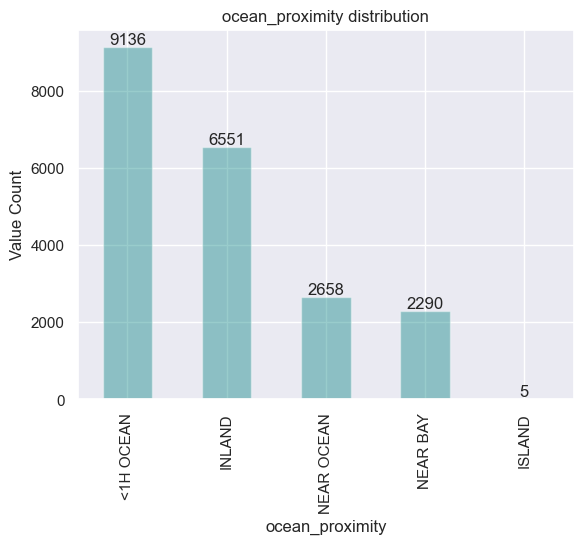

In [19]:
# plotting the distribution of ocean_proximity column

ax = ocean_values.plot.bar(title="ocean_proximity distribution", ylabel = "Value Count" , color = "teal" ,alpha = 0.4 )

ax.bar_label(ax.containers[0])


# Hnadling Missing Values

As per the histogram plot, total_bedrooms appear to be skewed and have few outliers. It would be best to fill these NA values with median value for total_bedrooms as the mean value will be heavily affected by outliers

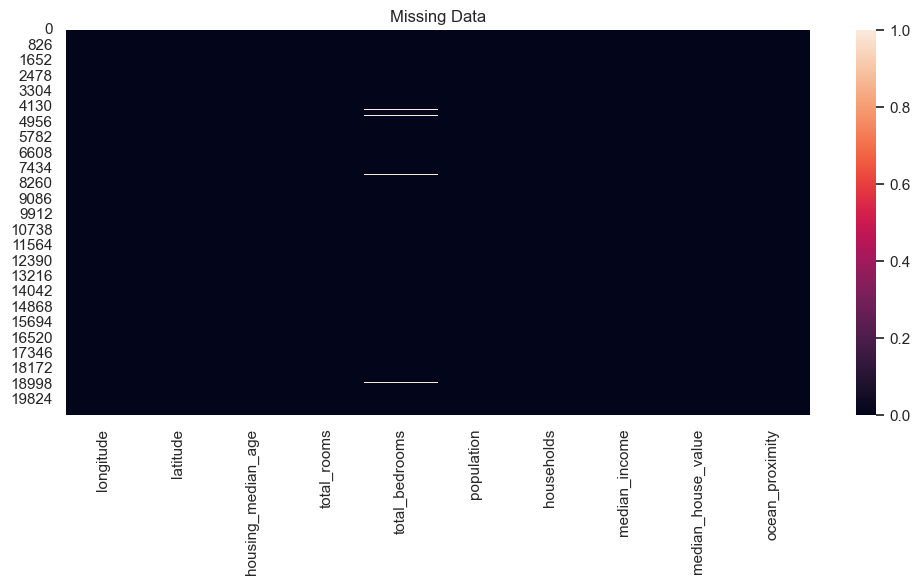

In [20]:
# showing missing data with heatmap before droping

plt.figure(figsize=(12,5))
sns.heatmap(df.isna());
plt.title('Missing Data')
plt.show()

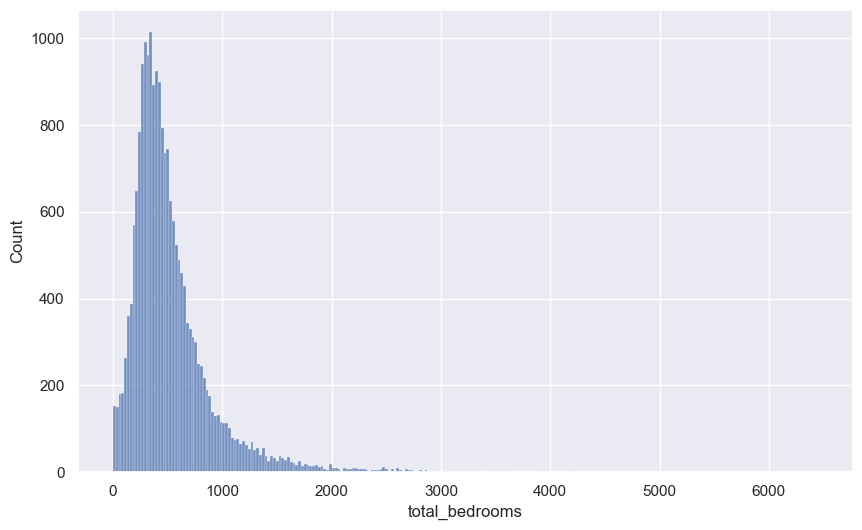

In [21]:
plt.figure(figsize= (10, 6))
sns.histplot(df['total_bedrooms']);

In [22]:
# fill NA with the median of total_bedrooms

total_bedrooms_median = df["total_bedrooms"].median()
df.total_bedrooms.fillna(total_bedrooms_median, inplace=True)

In [23]:
# checking missing data 
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Handling Outliers

### median_house_value

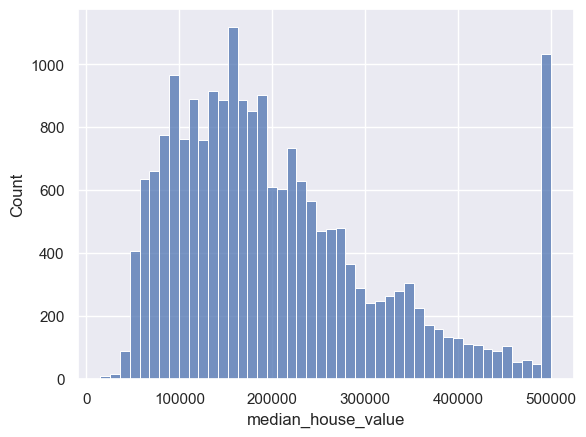

In [24]:
# taking a closer look at target variable to handle outliers

sns.histplot(df['median_house_value'])
plt.show()

In [25]:
house_value_q1 = df['median_house_value'].quantile(0.25)
house_value_q3 = df['median_house_value'].quantile(0.75)
house_value_iqr = house_value_q3 - house_value_q1 


In [26]:
# number of outliers
df['median_house_value'][df['median_house_value'] > house_value_q3 + (house_value_iqr * 1.5)].count()

1071

In [27]:
df = df[df['median_house_value'] < house_value_q3 + (house_value_iqr * 1.5)]
df.shape

(19569, 10)

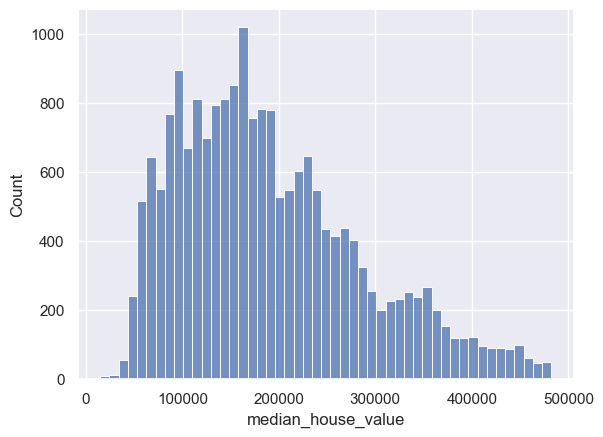

In [28]:
# Distribtion after removing outliers

sns.histplot(df['median_house_value'])
plt.show()

### households

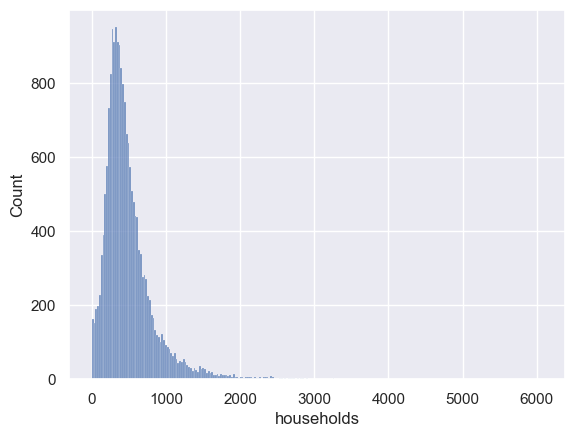

In [29]:
# taking a closer look at households variable to handle outliers

sns.histplot(df['households'])
plt.show()

In [30]:
households_q1 = df['households'].quantile(0.25)
households_q3 = df['households'].quantile(0.75)
households_iqr = households_q3 - households_q1

In [31]:
# number of outliers

df['households'][df['households'] > households_q3 + households_iqr * 1.5].count()

1158

In [32]:
df = df[df['households'] < households_q3 + households_iqr * 1.5]
df.shape

(18407, 10)

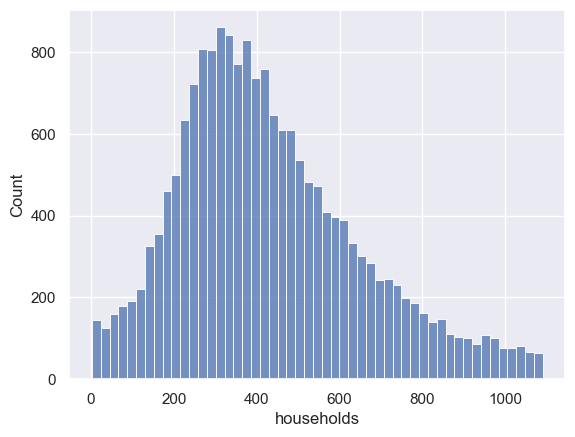

In [33]:
sns.histplot(df['households'])
plt.show()

### median_income

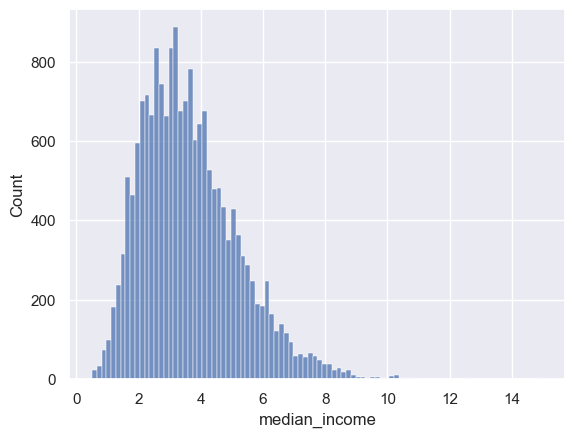

In [34]:
# taking a closer look at median_income variable to handle outliers

sns.histplot(df['median_income'])
plt.show()

In [35]:
median_income_q1 = df['median_income'].quantile(0.25)
median_income_q3 = df['median_income'].quantile(0.75)
median_income_iqr = median_income_q3 - median_income_q1

In [36]:
# number of outliers

df['median_income'][df['median_income'] > median_income_q3 + median_income_iqr * 1.5].count()

334

In [37]:
df = df[df['median_income'] < median_income_q3 + median_income_iqr * 1.5]
df.shape

(18073, 10)

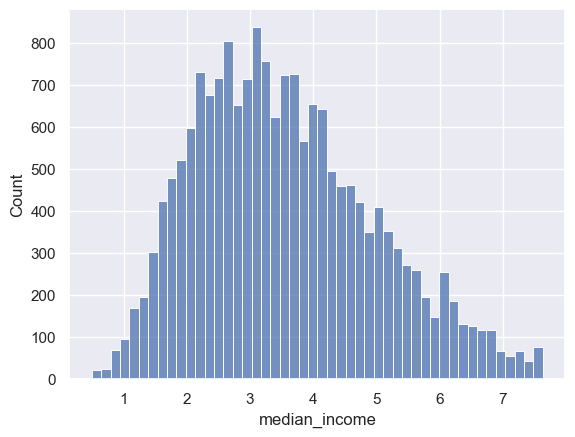

In [38]:
sns.histplot(df['median_income'])
plt.show()

# Encoding categorical variables

Converted categorical variables of ocean_proximity feature into numerical representations using label encoding where each category was assigned a Unique Integer value

In [39]:
## Label encode for categorical feature (ocean_proximity)

labelEncoder = LabelEncoder()
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])

df.describe()

longitude      latitude  housing_median_age   total_rooms   
count  18073.000000  18073.000000        18073.000000  18073.000000  \
mean    -119.585384     35.681159           29.219831   2237.514967   
std        2.004531      2.161550           12.273863   1235.751242   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.940000           19.000000   1391.000000   
50%     -118.550000     34.290000           30.000000   2016.000000   
75%     -118.020000     37.740000           37.000000   2866.000000   
max     -114.310000     41.950000           52.000000  12342.000000   

       total_bedrooms    population    households  median_income   
count    18073.000000  18073.000000  18073.000000   18073.000000  \
mean       464.204504   1257.836275    431.986887       3.560242   
std        244.121658    696.280694    221.014625       1.416915   
min          2.000000      3.000000      2.000000       0.499900   
25%        292.000000    777.000000    275.000000       2.487500   
50%        423.000000   1136.000000    395.000000       3.383900   
75%        598.000000   1616.000000    560.000000       4.476200   
max       2634.000000   8733.000000   1091.000000       7.634800   

       median_house_value  ocean_proximity  
count        18073.000000      18073.00000  
mean        186241.393017          1.15963  
std          92621.239490          1.40350  
min          14999.000000          0.00000  
25%         113500.000000          0.00000  
50%         169400.000000          1.00000  
75%         240700.000000          1.00000  
max         482200.000000          4.00000

# Model Building  

Split the dataset into 80% train and 20% test dataset

In [40]:
y = df["median_house_value"]
x = df.drop(["median_house_value"] , axis = 1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Scaling Numerical Features

Min-Max scaling was used to scale numerical features with huge ranges to a similar range to prevent certain features from dominating the analysis.


In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform (X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:

X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_train.columns)

X_test_scaled.describe()

longitude     latitude  housing_median_age  total_rooms   
count  3615.000000  3615.000000         3615.000000  3615.000000  \
mean      0.469771     0.333171            0.555957     0.181053   
std       0.199508     0.226048            0.238923     0.100074   
min      -0.005005     0.002125            0.000000    -0.000324   
25%       0.251251     0.150903            0.352941     0.111017   
50%       0.563564     0.196599            0.568627     0.163829   
75%       0.628128     0.550478            0.705882     0.233990   
max       0.973974     0.981934            1.000000     0.700794   

       total_bedrooms   population   households  median_income   
count     3615.000000  3615.000000  3615.000000    3615.000000  \
mean         0.175687     0.144385     0.396701       0.434848   
std          0.092679     0.080222     0.205999       0.201016   
min          0.000000    -0.000229     0.000000       0.000000   
25%          0.109043     0.087592     0.248852       0.282127   
50%          0.161854     0.130500     0.363636       0.411050   
75%          0.228723     0.185839     0.516070       0.564535   
max          0.626900     0.764207     0.999082       0.997645   

       ocean_proximity  
count      3615.000000  
mean          0.294744  
std           0.354803  
min           0.000000  
25%           0.000000  
50%           0.250000  
75%           0.250000  
max           1.000000

In [44]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns= X_train.columns)
X_train_scaled.describe()

longitude      latitude  housing_median_age   total_rooms   
count  14458.000000  14458.000000        14458.000000  14458.000000  \
mean       0.472474      0.333971            0.552673      0.180855   
std        0.200943      0.230621            0.241101      0.100203   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.255255      0.147715            0.352941      0.112597   
50%        0.576577      0.184910            0.568627      0.162613   
75%        0.629630      0.552604            0.705882      0.231416   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income   
count    14458.000000  14458.000000  14458.000000   14458.000000  \
mean         0.175590      0.143331      0.394382       0.427445   
std          0.092773      0.079665      0.202187       0.197957   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.110562      0.088680      0.250689       0.277775   
50%          0.159574      0.129354      0.359963       0.402781   
75%          0.226064      0.184349      0.511478       0.555348   
max          1.000000      1.000000      1.000000       1.000000   

       ocean_proximity  
count     14458.000000  
mean          0.288698  
std           0.349888  
min           0.000000  
25%           0.000000  
50%           0.250000  
75%           0.250000  
max           1.000000

# Multiple Linear Regression

In [45]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [46]:
reg.intercept_

316547.8999492505

In [47]:
reg.coef_


array([-372814.96683016, -344152.76289908,   45154.32544502,
       -223747.29476938,  362942.72916166, -391000.60016034,
        109765.6571997 ,  292983.20092388,   -3031.60749339])

In [48]:
Coeficient=pd.DataFrame(reg.coef_,x.columns,columns=["Coeficient"])
Coeficient

Coeficient
longitude          -372814.966830
latitude           -344152.762899
housing_median_age   45154.325445
total_rooms        -223747.294769
total_bedrooms      362942.729162
population         -391000.600160
households          109765.657200
median_income       292983.200924
ocean_proximity      -3031.607493

In [49]:
y_pred = reg.predict(X_test_scaled)
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_mae = mean_absolute_error(y_test , y_pred)
reg_R2_score = r2_score(y_test , y_pred)
p = len(X_train_scaled.columns)
n = len(y_train)
reg_adj_R2 = 1-((1-reg_R2_score)*(n-1)/(n-p-1))
reg_mape = mean_absolute_percentage_error(y_test , y_pred)


print(f"Training Score_reg: {reg.score(X_train_scaled, y_train):.4f}")
print(f"Testing Score_reg: {reg.score(X_test_scaled, y_test):.4f}")
print(f"MSE_reg: {reg_mse:.4f}")
print(f"RMSE_reg: {reg_rmse:.4f}")
print(f"MAE_reg: {reg_mae:.4f}")
print(f"R squared of linear regression: {reg_R2_score:.4f}")
print(f"Adjusted R squared of linear regression: {reg_adj_R2:.4f}")
print(f"Mean absolute percentage error of linear regression: {reg_mape*100:.2f}%")

Training Score_reg: 0.5917
Testing Score_reg: 0.5987
MSE_reg: 3555499321.0027
RMSE_reg: 59628.0079
MAE_reg: 44844.4525
R squared of linear regression: 0.5987
Adjusted R squared of linear regression: 0.5984
Mean absolute percentage error of linear regression: 28.56%


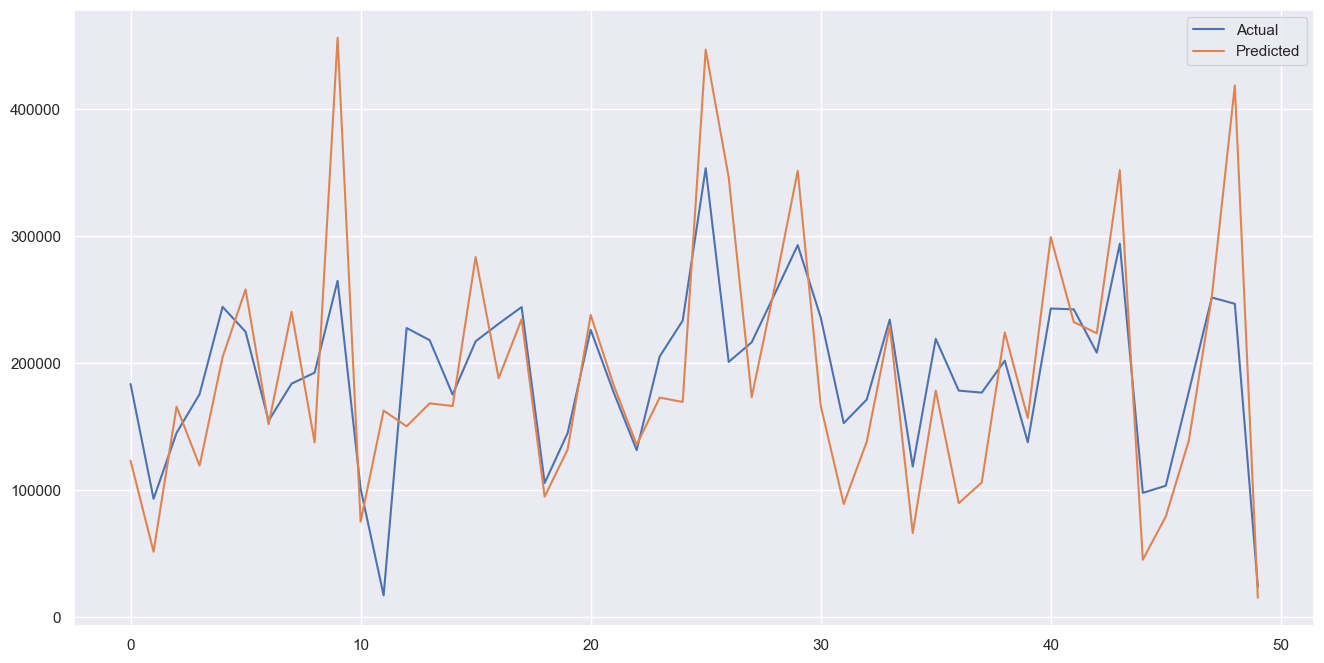

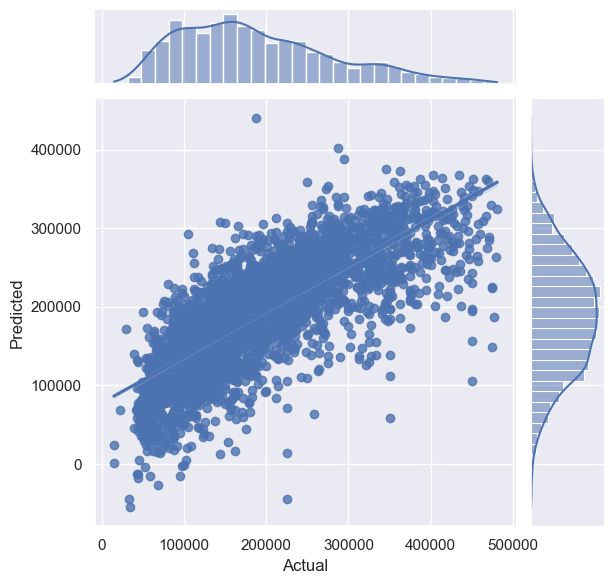

In [50]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# Decision Tree Regression

In [51]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=9)

In [52]:
dtReg_y_pred = dtReg.predict(X_test_scaled)
dtReg_y_pred

array([135048.14814815,  60741.17647059, 184608.81801126, ...,
       145206.22009569, 109128.        , 128028.57142857])

In [53]:
print(dtReg_y_pred[0:5])
print(y_test[0:5])

[135048.14814815  60741.17647059 184608.81801126 117855.23255814
 241524.15458937]
2218     123000.0
2090      51300.0
10917    165600.0
250      119100.0
20492    204600.0
Name: median_house_value, dtype: float64


In [54]:
dtReg_y_pred = dtReg.predict(X_test_scaled)
dtReg_mse = mean_squared_error(y_test,dtReg_y_pred)
dtReg_rmse = np.sqrt(dtReg_mse)
dtReg_mae = mean_absolute_error(y_test , dtReg_y_pred)
dtReg_R2_score = r2_score(y_test , dtReg_y_pred)
p = len(X_train_scaled.columns)
n = len(y_train)
dtReg_adj_R2 = 1-((1- dtReg_R2_score)*(n-1)/(n-p-1))
dtReg_mape = mean_absolute_percentage_error(y_test , dtReg_y_pred)


print(f"Training Score_reg: {dtReg.score(X_train_scaled, y_train):.4f}")
print(f"Testing Score_reg: {dtReg.score(X_test_scaled, y_test):.4f}")
print(f"MSE_reg: {dtReg_mse:.4f}")
print(f"RMSE_reg: {dtReg_rmse:.4f}")
print(f"MAE_reg: {dtReg_mae:.4f}")
print(f"R squared of linear regression: {dtReg_R2_score:.4f}")
print(f"Adjusted R squared of linear regression: {dtReg_adj_R2:.4f}")
print(f"Mean absolute percentage error of linear regression: {dtReg_mape * 100:.2f}%")

Training Score_reg: 0.7611
Testing Score_reg: 0.6497
MSE_reg: 3103343374.2805
RMSE_reg: 55707.6599
MAE_reg: 38335.5335
R squared of linear regression: 0.6497
Adjusted R squared of linear regression: 0.6495
Mean absolute percentage error of linear regression: 22.35%


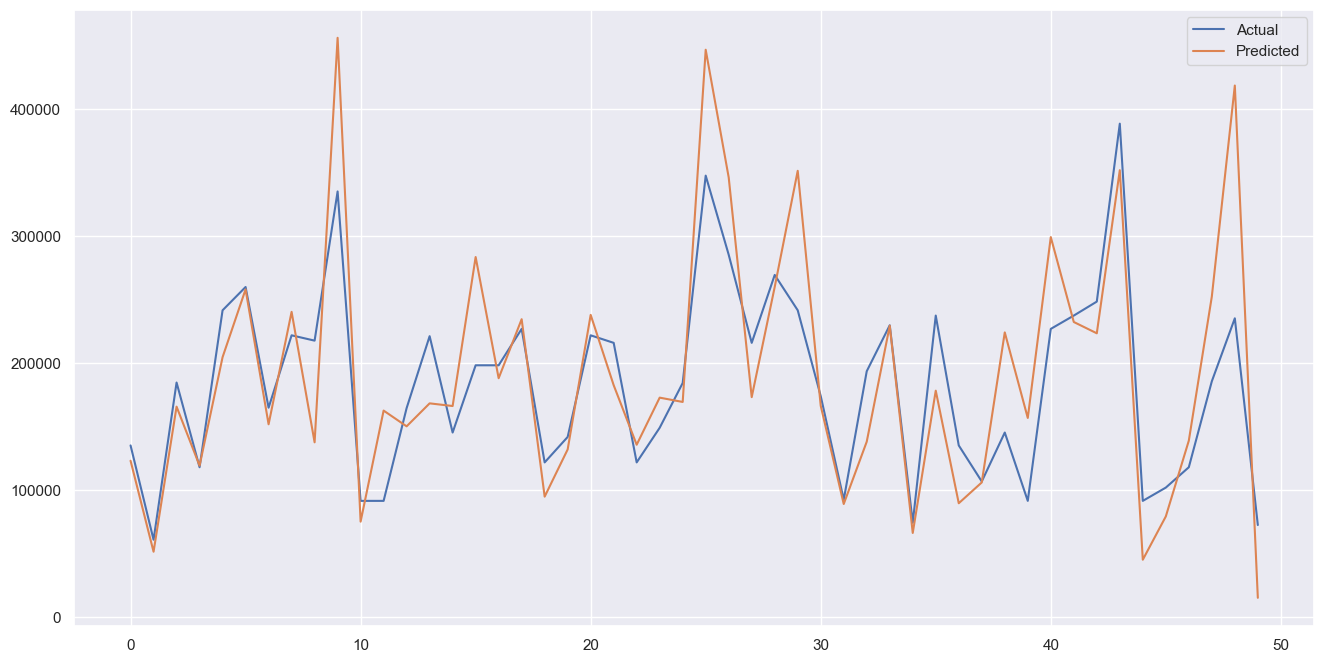

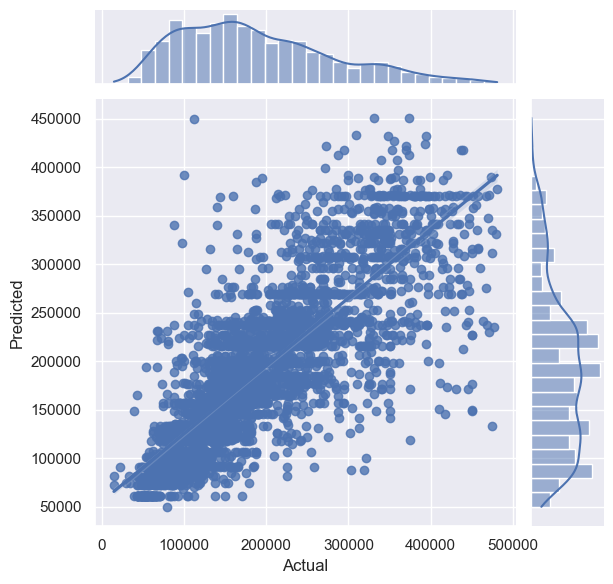

In [55]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Bagging Regressor

In [56]:
bag = BaggingRegressor(estimator=dtReg,n_estimators=500, random_state=1)
bag.fit(X_train_scaled,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=9), n_estimators=500,
                 random_state=1)

In [57]:
bag_y_pred = bag.predict(X_test_scaled)
bag_y_pred

array([151506.56047644,  60006.97884906, 184675.30934576, ...,
       153192.27786737,  99083.62794741,  91493.22754808])

In [58]:
bag_mse = mean_squared_error(y_test,bag_y_pred)
bag_rmse = np.sqrt(bag_mse)
bag_mae = mean_absolute_error(y_test , bag_y_pred)
bag_R2_score = r2_score(y_test , bag_y_pred)
p = len(X_test_scaled.columns)
n = len(y_train)
bag_adj_R2 = 1-(1- bag_R2_score)*(n-1)/(n-p-1)
bag_mape = mean_absolute_percentage_error(y_test , bag_y_pred)


print(f"Training Score_reg: {bag.score(X_train_scaled, y_train):.4f}")
print(f"Testing Score_reg: {bag.score(X_test_scaled, y_test):.4f}")
print(f"MSE_reg: {bag_mse:.4f}")
print(f"RMSE_reg: {bag_rmse:.4f}")
print(f"MAE_reg: {bag_mae:.4f}")
print(f"R squared of linear regression: {bag_R2_score:.4f}")
print(f"Adjusted R squared of linear regression: {bag_adj_R2:.4f}")
print(f"Mean absolute percentage error of linear regression: {bag_mape * 100:.2f}%")

Training Score_reg: 0.8066
Testing Score_reg: 0.7309
MSE_reg: 2384339401.2389
RMSE_reg: 48829.6979
MAE_reg: 34079.5175
R squared of linear regression: 0.7309
Adjusted R squared of linear regression: 0.7307
Mean absolute percentage error of linear regression: 20.29%


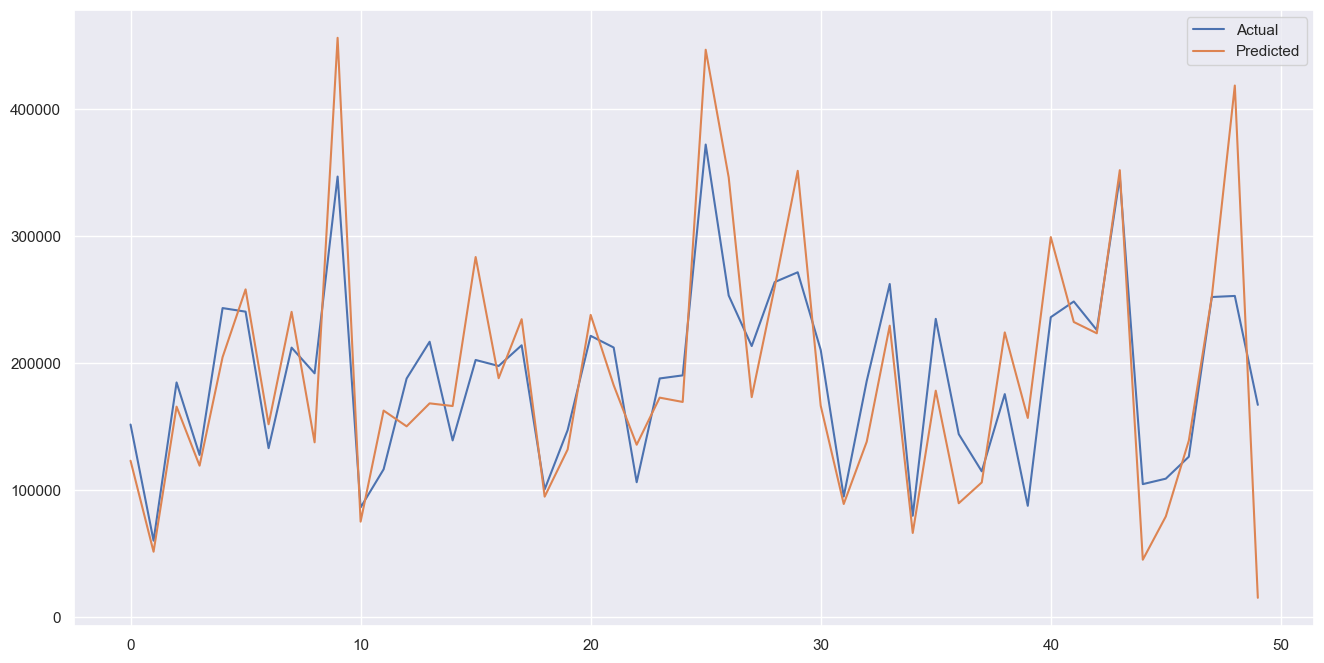

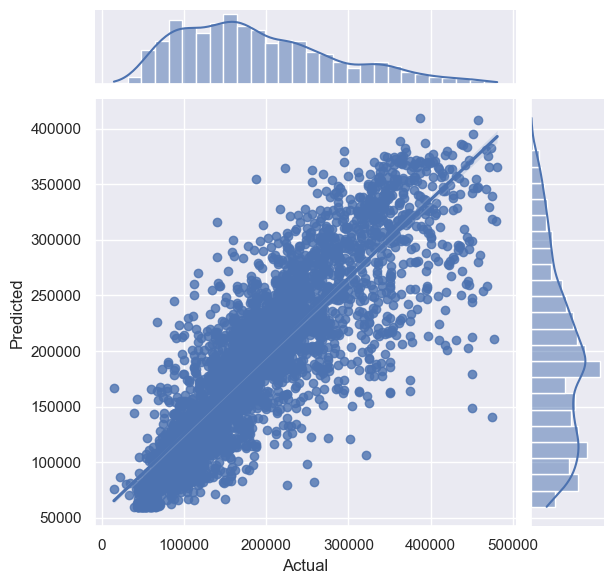

In [59]:
test = pd.DataFrame({'Predicted':bag_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# AdaBoostRegressor

In [60]:
AdaBoost = AdaBoostRegressor(estimator=dtReg, random_state=1, n_estimators=100)
AdaBoost.fit(X_train_scaled,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=9),
                  n_estimators=100, random_state=1)

In [61]:
AdaBoost_y_pred = AdaBoost.predict(X_test_scaled)
AdaBoost_y_pred

array([165144.44444444,  82466.31205674, 189565.2173913 , ...,
       200296.85314685, 126577.54010695, 119386.61971831])

In [62]:
AdaBoost_mse = mean_squared_error(y_test,AdaBoost_y_pred)
AdaBoost_rmse = np.sqrt(AdaBoost_mse)
AdaBoost_mae = mean_absolute_error(y_test , AdaBoost_y_pred)
AdaBoost_R2_score = r2_score(y_test , AdaBoost_y_pred)
p = len(X_train_scaled.columns)
n = len(y_train)
AdaBoost_adj_R2 = 1-(1-AdaBoost_R2_score)*(n-1)/(n-p-1)
AdaBoost_mape = mean_absolute_percentage_error(y_test , AdaBoost_y_pred)


print(f"Training Score_reg: {AdaBoost.score(X_train_scaled, y_train):.4f}")
print(f"Testing Score_reg: {AdaBoost.score(X_test_scaled, y_test):.4f}")
print(f"MSE_reg: {AdaBoost_mse:.4f}")
print(f"RMSE_reg: {AdaBoost_rmse:.4f}")
print(f"MAE_reg: {AdaBoost_mae:.4f}")
print(f"R squared of linear regression: {AdaBoost_R2_score:.4f}")
print(f"Adjusted R squared of linear regression: {AdaBoost_adj_R2:.4f}")
print(f"Mean absolute percentage error of linear regression: {AdaBoost_mape * 100:.2f}%")

Training Score_reg: 0.8491
Testing Score_reg: 0.7444
MSE_reg: 2264971340.7423
RMSE_reg: 47591.7150
MAE_reg: 37299.9505
R squared of linear regression: 0.7444
Adjusted R squared of linear regression: 0.7442
Mean absolute percentage error of linear regression: 25.63%


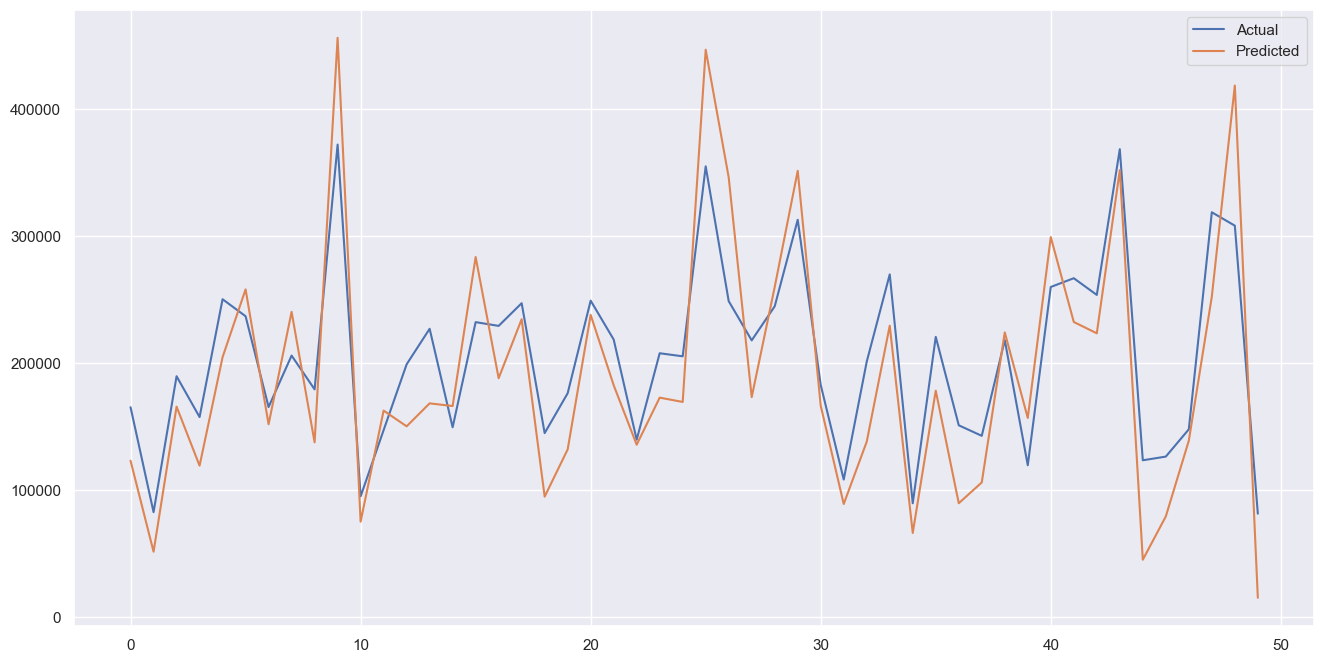

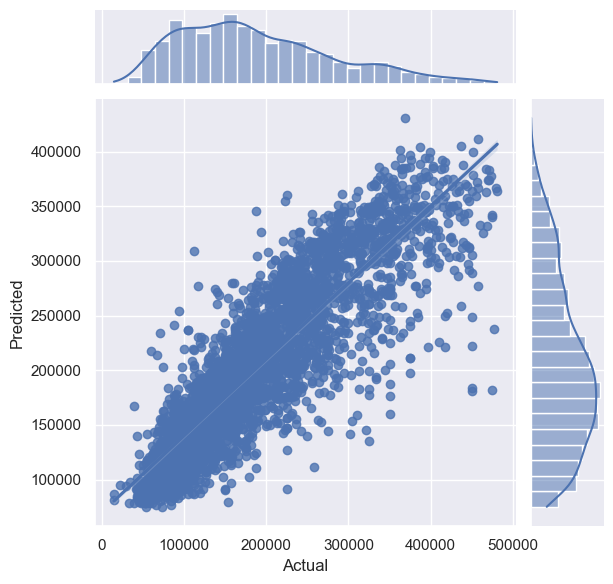

In [63]:
test = pd.DataFrame({'Predicted':AdaBoost_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

# Random Forest Regression

In [64]:
rfReg = RandomForestRegressor(500)
rfReg.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=500)

In [65]:
rfReg_y_pred = rfReg.predict(X_test_scaled)
rfReg_y_pred

array([133852. ,  54178.8, 165984.8, ..., 169671.2,  98380. , 101293.2])

In [66]:
rfReg_mse = mean_squared_error(y_test,rfReg_y_pred)
rfReg_rmse = np.sqrt(rfReg_mse)
rfReg_mae = mean_absolute_error(y_test , rfReg_y_pred)
rfReg_R2_score = r2_score(y_test , rfReg_y_pred)
p = len(X_train_scaled.columns)
n = len(y_train)
rfReg_adj_R2 = 1-(1-rfReg_R2_score)*(n-1)/(n-p-1)
rfReg_mape = mean_absolute_percentage_error(y_test , rfReg_y_pred)


print(f"Training Score_reg: {rfReg.score(X_train_scaled, y_train):.4f}")
print(f"Testing Score_reg: {rfReg.score(X_test_scaled, y_test):.4f}")
print(f"MSE_reg: {rfReg_mse:.4f}")
print(f"RMSE_reg: {rfReg_rmse:.4f}")
print(f"MAE_reg: {rfReg_mae:.4f}")
print(f"R squared of linear regression: {rfReg_R2_score:.4f}")
print(f"Adjusted R squared of linear regression: {rfReg_adj_R2:.4f}")
print(f"Mean absolute percentage error of linear regression: {rfReg_mape * 100:.2f}%")

Training Score_reg: 0.9695
Testing Score_reg: 0.7806
MSE_reg: 1943543474.3117
RMSE_reg: 44085.6380
MAE_reg: 29599.7641
R squared of linear regression: 0.7806
Adjusted R squared of linear regression: 0.7805
Mean absolute percentage error of linear regression: 17.38%


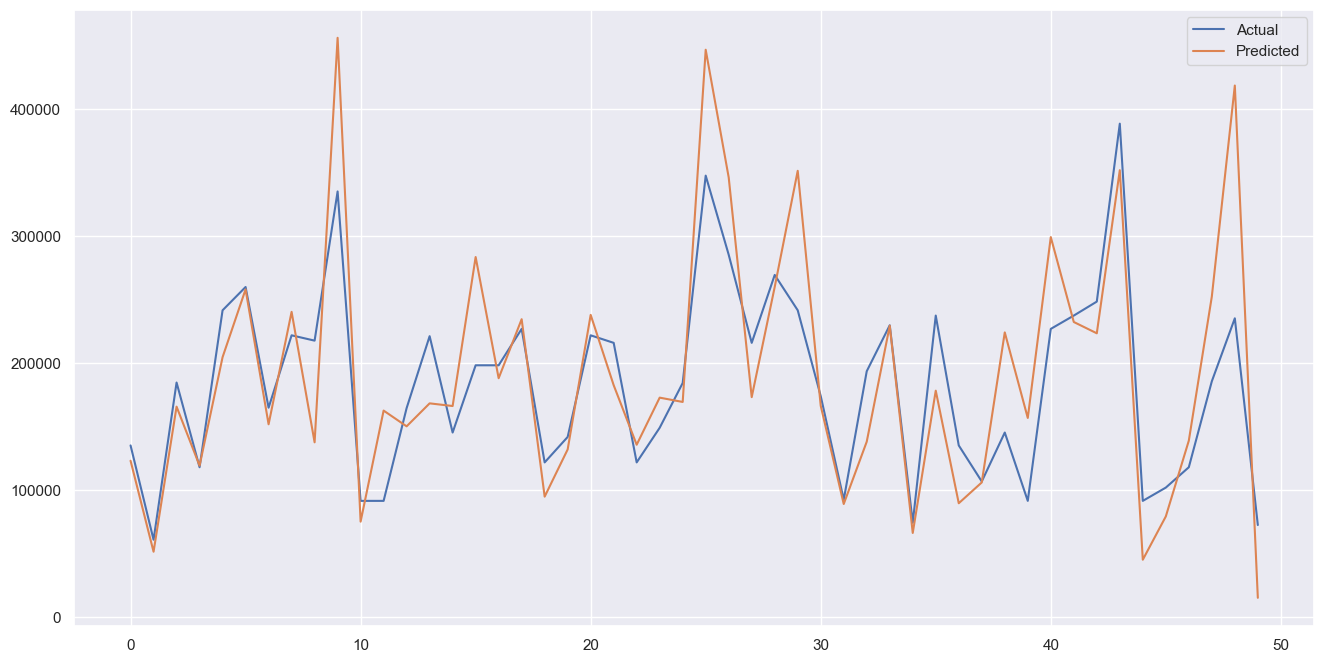

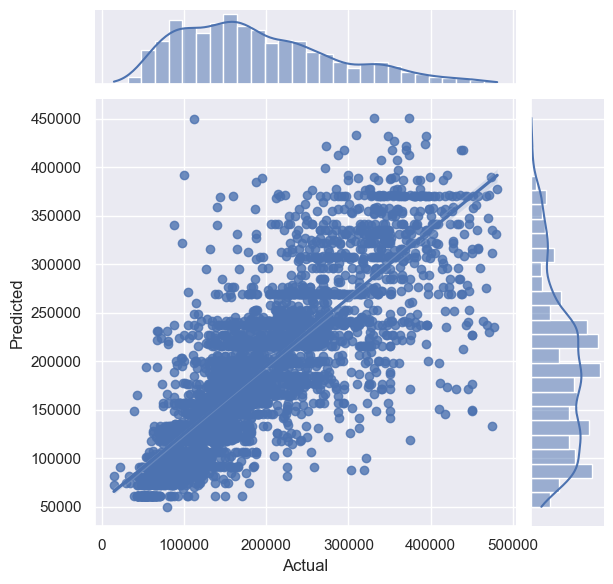

In [67]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")